In [1]:
from csv_analysis import BayesDB_Simulator, pred_wrapper
%matplotlib inline
from matplotlib import pyplot as pl
import pandas as pd
import numpy as np
import seaborn as sb
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [2]:
fish_id = "091418_bdb"
#file_id = "bdb_hunts_inverted.bdb"
file_id = "bdb_hunts.bdb"
bdsim = BayesDB_Simulator(fish_id, file_id, -1)
#data = pd.read_csv('091418_bdb/huntbouts_inverted.csv')
data = pd.read_csv('091418_bdb/all_huntbouts.csv')
#nac_data = pd.read_csv('huntbouts_rad.csv')

SELECT "Para Alt" FROM bout_table WHERE "Para Alt" BETWEEN 0 AND .3 AND "Para Alt Velocity" > 0 AND "Strike Or Abort" < 3
SELECT "Para Alt" FROM bout_table WHERE "Para Alt" BETWEEN 0 AND .3 AND "Para Alt Velocity" <  0 AND "Strike Or Abort" < 3
50 bouts in Blue Query
Mean Blue = 0.16771968278
108 bouts in Yellow Query
Mean Yellow = 0.190944727685
Ttest_indResult(statistic=-1.6376707552244891, pvalue=0.10350594311467186)


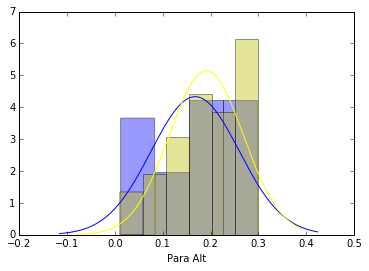

In [21]:
two_p = bdsim.compare_2_queries('"Para Alt"', 
                                '"Para Alt" BETWEEN 0 AND .3 AND "Para Alt Velocity" > 0 AND "Strike Or Abort" < 3', 
                                '"Para Alt" BETWEEN 0 AND .3 AND "Para Alt Velocity" <  0 AND "Strike Or Abort" < 3', 1, 0)
pl.savefig('2VP.pdf')

SELECT "Para Az" FROM bout_table WHERE "Para Az" BETWEEN 0 AND .1 AND "Para Az Velocity" > 0
SELECT "Para Az" FROM bout_table WHERE "Para Az" BETWEEN 0 AND .1 AND "Para Az Velocity" <  0
148 bouts in Blue Query
Mean Blue = 0.0522374687365
101 bouts in Yellow Query
Mean Yellow = 0.0533410125545
Ttest_indResult(statistic=-0.29811617683853742, pvalue=0.76586511255418888)


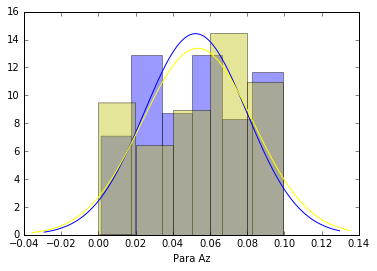

In [22]:
two_p = bdsim.compare_2_queries('"Para Az"', 
                                '"Para Az" BETWEEN 0 AND .1 AND "Para Az Velocity" > 0', 
                                '"Para Az" BETWEEN 0 AND .1 AND "Para Az Velocity" <  0', 1, 0)

SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN 0 AND .2 AND "Para Az Velocity" > 0
SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN 0 AND .2 AND "Para Az Velocity" <  0
241 bouts in Blue Query
Mean Blue = 0.0624619321037
169 bouts in Yellow Query
Mean Yellow = 0.0153847710118
Ttest_indResult(statistic=5.0807366828926863, pvalue=5.7340376889491932e-07)


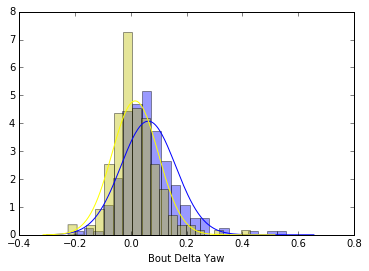

In [23]:
two_p = bdsim.compare_2_queries('"Bout Delta Yaw"', 
                                '"Para Az" BETWEEN 0 AND .2 AND "Para Az Velocity" > 0', 
                                '"Para Az" BETWEEN 0 AND .2 AND "Para Az Velocity" <  0', 1, 0)

SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN 0 AND .2 AND "Para Az Velocity" > 0 AND "Strike Or Abort" <= 3
SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN 0 AND .2 AND "Para Az Velocity" <  0 AND "Strike Or Abort" <= 3
201 bouts in Blue Query
Mean Blue = 0.24154280199
146 bouts in Yellow Query
Mean Yellow = 0.0653716362466
Ttest_indResult(statistic=4.0453131445590067, pvalue=6.45165619546859e-05)


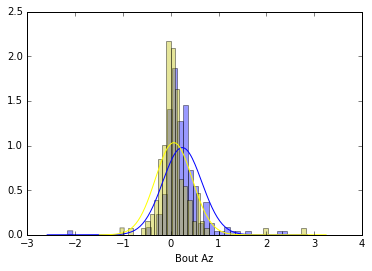

In [24]:
two_p = bdsim.compare_2_queries('"Bout Az"', 
                                '"Para Az" BETWEEN 0 AND .2 AND "Para Az Velocity" > 0 AND "Strike Or Abort" <= 3', 
                                '"Para Az" BETWEEN 0 AND .2 AND "Para Az Velocity" <  0 AND "Strike Or Abort" <= 3', 1, 0)

SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN 0 AND .3 AND "Para Alt Velocity" > 0
SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN 0 AND .3 AND "Para Alt Velocity" <  0
126 bouts in Blue Query
Mean Blue = 0.112112909651
183 bouts in Yellow Query
Mean Yellow = -0.0645936210164
Ttest_indResult(statistic=3.4822704509711002, pvalue=0.00056936634709729293)


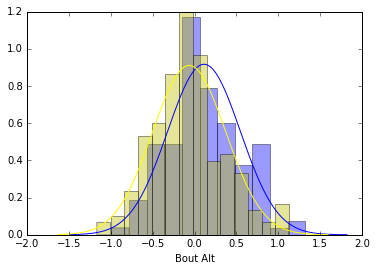

In [30]:
two_p = bdsim.compare_2_queries('"Bout Alt"', 
                                '"Para Alt" BETWEEN 0 AND .3 AND "Para Alt Velocity" > 0', 
                                '"Para Alt" BETWEEN 0 AND .3 AND "Para Alt Velocity" <  0', 1, 0)

SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN 0 AND .3 AND "Para Alt Velocity" > 0 AND "Strike Or Abort" < 3
SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN 0 AND .3 AND "Para Alt Velocity" <  0 AND "Strike Or Abort" < 3
50 bouts in Blue Query
Mean Blue = 0.20180585104
108 bouts in Yellow Query
Mean Yellow = -0.109679967389
Ttest_indResult(statistic=4.1934071944998728, pvalue=4.592211261090431e-05)


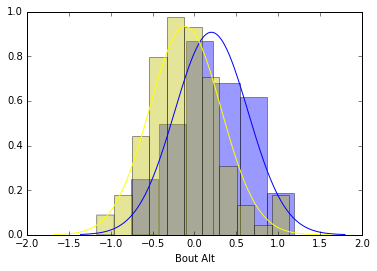

In [32]:
two_p = bdsim.compare_2_queries('"Bout Alt"', 
                                '"Para Alt" BETWEEN 0 AND .3 AND "Para Alt Velocity" > 0 AND "Strike Or Abort" < 3', 
                                '"Para Alt" BETWEEN 0 AND .3 AND "Para Alt Velocity" <  0 AND "Strike Or Abort" < 3',
                                1, 0)
pl.savefig('2VP.pdf')

SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN 0 AND .1 AND "Postbout Para Az" > 0
SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN 0 AND .1 AND "Postbout Para Az" <  0
166 bouts in Blue Query
83 bouts in Yellow Query


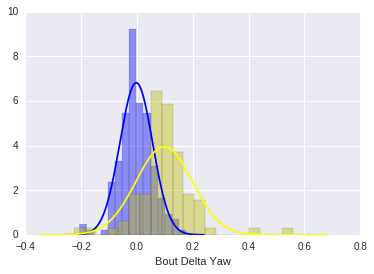

In [7]:
two_p = bdsim.compare_2_queries('"Bout Delta Yaw"', 
                                '"Para Az" BETWEEN 0 AND .1 AND "Postbout Para Az" > 0', 
                                '"Para Az" BETWEEN 0 AND .1 AND "Postbout Para Az" <  0', 1, 0)

SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN -.3 AND .3 AND "Para Alt Velocity" BETWEEN -.5 AND -.2  AND "Para Alt Accel" > 0
SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN -.3 AND .3 AND  "Para Alt Velocity" BETWEEN -.5 AND -.2 AND "Para Alt Accel" < 0
17 bouts in Blue Query
17 bouts in Yellow Query


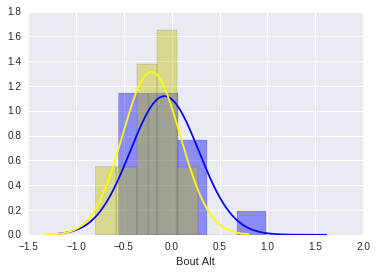

In [67]:
two_p = bdsim.compare_2_queries('"Bout Alt"', 
                                '"Para Alt" BETWEEN -.3 AND .3 AND "Para Alt Velocity" BETWEEN -.5 AND -.2  AND "Para Alt Accel" > 0', 
                                '"Para Alt" BETWEEN -.3 AND .3 AND  "Para Alt Velocity" BETWEEN -.5 AND -.2 AND "Para Alt Accel" < 0',
                                1, 0)

SELECT "Bout Alt" FROM bout_table WHERE "Para Alt Velocity" BETWEEN -.5 AND -.3  AND "Para Alt Accel" > 0
SELECT "Bout Alt" FROM bout_table WHERE "Para Alt Velocity" BETWEEN -.5 AND -.3 AND "Para Alt Accel" < 0
34 bouts in Blue Query
Mean Blue = -0.0555947938529
30 bouts in Yellow Query
Mean Yellow = -0.0754883880333
Ttest_indResult(statistic=0.1591355954081129, pvalue=0.8740793038521486)


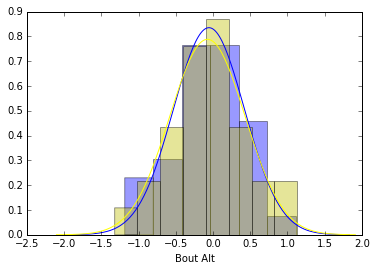

In [58]:
two_p = bdsim.compare_2_queries('"Bout Alt"', 
                                '"Para Alt Velocity" BETWEEN -.5 AND -.3  AND "Para Alt Accel" > 0', 
                                '"Para Alt Velocity" BETWEEN -.5 AND -.3 AND "Para Alt Accel" < 0',
                                1, 0)

SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN 0 AND .1 AND "Postbout Para Az" < 0 AND "Para Az Velocity" > 0
SELECT "Bout Delta Yaw" FROM bout_table WHERE "Para Az" BETWEEN 0 AND .1 AND "Postbout Para Az" <  0 AND "Para Az Velocity" < 0
21 bouts in Blue Query
Mean Blue = 0.123667421714
22 bouts in Yellow Query
Mean Yellow = 0.0351933285455
Ttest_indResult(statistic=2.7498235451469513, pvalue=0.0088308114950980416)


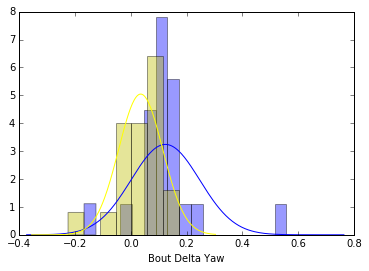

In [4]:
two_p = bdsim.compare_2_queries('"Bout Delta Yaw"', '"Para Az" BETWEEN 0 AND .1 AND "Postbout Para Az" < 0 AND "Para Az Velocity" > 0', '"Para Az" BETWEEN 0 AND .1 AND "Postbout Para Az" <  0 AND "Para Az Velocity" < 0', 1, 0)

SELECT "Para Alt","Bout Dist" FROM bout_table WHERE "Bout Number" >= 0 AND "Strike Or Abort" <= 2


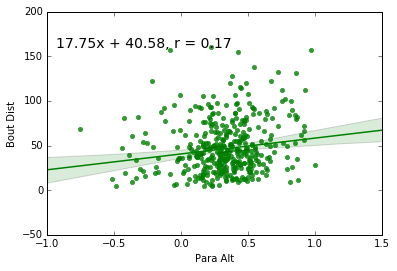

In [8]:
query_exp = '"Para Alt","Bout Dist"'
#rp = bdsim.two_variable_regression(query_exp, '"Para Az" BETWEEN 0 and .1')
rp = bdsim.two_variable_regression(query_exp, '"Bout Number" >= 0 AND "Strike Or Abort" <= 2')
#rp = bdsim.two_variable_regression(query_exp, '')
rp.savefig('regplot.pdf')

In [55]:
#p_angle_bounds = [[0, .1]]
p_angle_bounds = [[0, .2], [.2, .4], [.4, .6]]
#distance_limit = [0, 1000]
#p_angle_bounds = [[0, 1]]
distance_limit = [0, 200]
actions = [1,2]
skip_bout_numbers = [-1]

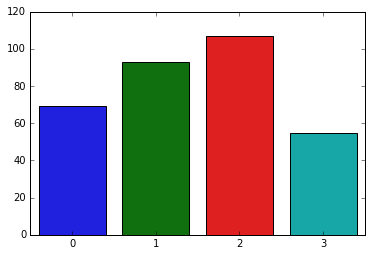

(0.4485981308411215, 0.38181818181818183, 0.6956521739130435, 0.6344086021505376)


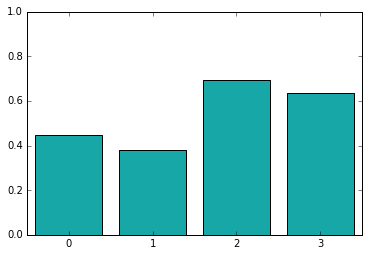

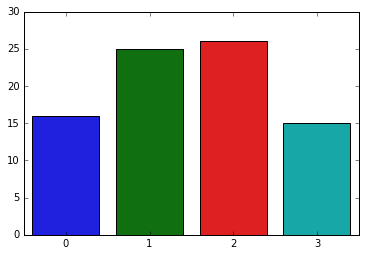

(0.46153846153846156, 0.26666666666666666, 0.75, 0.56)


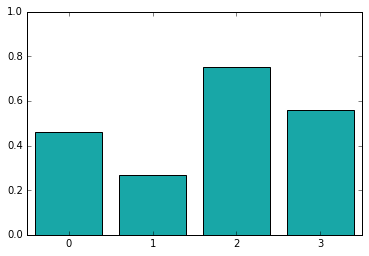

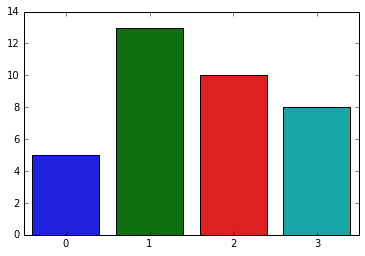

(0.2, 0.375, 0.4, 0.6153846153846154)


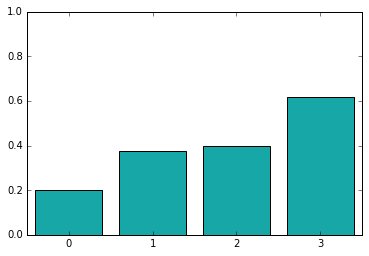

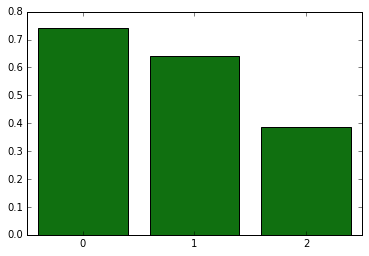

In [56]:
tb, bout_assignment = pred_wrapper(data, p_angle_bounds, skip_bout_numbers, actions, distance_limit, 'az')

ValueError: `dataset` input should have multiple elements.

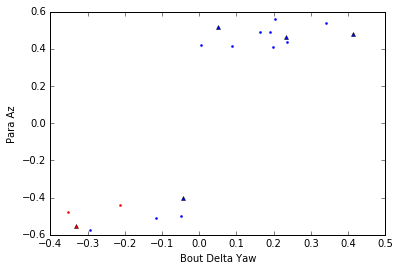

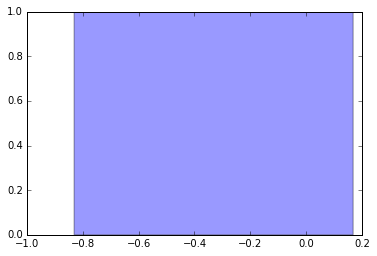

In [57]:
varb = "Bout Delta Yaw"
varb_predict_overshoot = []
varb_predict_undershoot = []

p_angle_bounds = p_angle_bounds[0]
plot_varb1 = "Bout Delta Yaw"
plot_varb2 = "Para Az"

# a bout assignment of 1 is an undershooting lag.
# bout assignment of 2 is an overshooting lag
# bout assignment of 3 is an undershooting lead.
# bout assignment of 4 is an overshooting lead

# dots are lags, triangles are leads
# blue is undershoot, red is overshoot

for ind, p_az in enumerate(data["Para Az"]):
        marker_size = 4
        if bout_assignment[ind] == 0:
            continue
        if bout_assignment[ind] == 1:
            marker_type = '.'
            p_color = 'b'
        if bout_assignment[ind] == 2:
            marker_type = '.'
            p_color = 'r'
        if bout_assignment[ind] == 3:
            marker_type = '^'
            p_color = 'b'
            varb_predict_undershoot.append(data[varb][ind])
        if bout_assignment[ind] == 4:
            marker_type = '^'
            p_color = 'r'
            varb_predict_overshoot.append(data[varb][ind])
        pl.plot(data[plot_varb1][ind], data[plot_varb2][ind], color=p_color,
            marker=marker_type, ms=marker_size, linestyle='None')
        pl.xlabel(plot_varb1)
        pl.ylabel(plot_varb2)
pl.savefig('circle_triangle_plot.pdf')
pl.figure()
sb.distplot(varb_predict_overshoot, fit_kws={"color":"blue"}, fit=norm, kde=False,color='b')
sb.distplot(varb_predict_undershoot, fit_kws={"color":"yellow"}, fit=norm, kde=False,color='y')


pl.savefig('prediction_tally.pdf')

# RED CIRCLES ARE A FAIL TO LEAD WHEN PARA IS GOING RIGHT
# BLUE CIRCLES ARE A FAIL TO LEAD WHEN PARA IS GOING LEFT
# RED SQUARES ARE A SUCCESSFUL LEAD WHEN PARA IS GOING RIGHT
# BLUE TRIANGLES ARE SUCCESSFUL LEADS WHEN PARA IS GOING LEFT
# RED CIRCLES ACCOUNT FOR NOT SEEING A CHANGE IN BOUT AZ AND YAW IN THIS WINDOW! 

In [16]:
from collections import Counter
Counter(bout_assignment)


Counter({0: 305, 1: 56, 2: 17, 3: 35, 4: 29})

SELECT "Para Alt Velocity" FROM bout_table


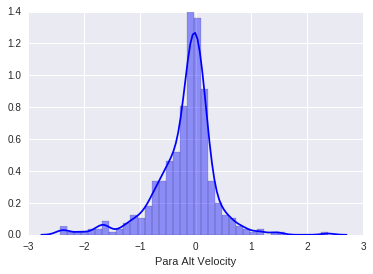

In [63]:
#p = bdsim.single_hist('"Para Alt Velocity"', '"Para Alt" BETWEEN .3 AND .5')
d = bdsim.single_hist('"Para Alt Velocity"', '')

In [21]:
print(bout_assignment)

[0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1]


In [22]:
len(bout_assignment)

54

In [ ]:
len(data["Para Az"])

In [ ]:
pred_velocities = []
for loc, i in enumerate(bout_assignment):
    if i != 0:
        pred_velocities.append(data["Para Az Velocity"][loc])
pl.hist(3*np.degrees(pred_velocities), bins=20)

        
        

#         print('Pred Bout Assignment: ' + str(bout_assignment[loc]))
#         a = raw_input('')

In [ ]:
print np.degrees(np.mean(np.abs(data["Para Az Velocity"])))
#print np.degrees(np.mean(np.abs(nac_data["Para Az Velocity"])))